In [4]:
import pandas as pd

In [5]:
df = pd.read_excel(r'datasets\combined_students_data.xlsx')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28403 entries, 0 to 28402
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 28403 non-null  object 
 1   Age                                    28403 non-null  int64  
 2   City                                   28403 non-null  object 
 3   Academic Pressure                      28403 non-null  int64  
 4   CGPA                                   28403 non-null  float64
 5   Study Satisfaction                     28403 non-null  int64  
 6   Sleep Duration                         28403 non-null  float64
 7   Unnamed: 7                             28403 non-null  object 
 8   Degree                                 28403 non-null  object 
 9   Have you ever had suicidal thoughts ?  28403 non-null  int64  
 10  Work/Study Hours                       28403 non-null  int64  
 11  Fi

In [4]:
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Unnamed: 7,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,M,28,Varanasi,2,6.51,4,7.5,1,BA,1,9,2,1,0
1,M,28,Bangalore,4,7.48,5,5.5,2,MD,1,7,1,1,0
2,M,25,Rajkot,1,7.21,3,5.5,0,MBBS,1,10,4,0,1
3,M,23,Mumbai,1,9.90,4,9.0,0,MSc,1,7,2,1,0
4,F,31,Vadodara,1,5.97,5,9.0,2,LLM,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28398,F,27,Surat,5,5.75,5,5.5,0,'Class 12',1,7,1,1,0
28399,M,27,Ludhiana,2,9.40,3,4.5,2,MSc,0,0,3,1,0
28400,M,31,Faridabad,3,6.61,4,5.5,0,MD,0,12,2,0,0
28401,F,18,Ludhiana,5,6.88,2,4.5,2,'Class 12',1,10,5,0,1


In [5]:
df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
count,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000
mean,25.829701,3.138788,7.654544,2.946168,6.490501,0.630778,7.143682,0.483752,0.584023
std,4.905749,1.381710,1.470633,1.361454,1.740958,0.482603,3.709519,0.499745,0.492898
min,18.000000,0.000000,0.000000,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,6.280000,2.000000,4.500000,0.000000,4.000000,0.000000,0.000000
50%,26.000000,3.000000,7.770000,3.000000,5.500000,1.000000,8.000000,0.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,7.500000,1.000000,10.000000,1.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,9.000000,1.000000,12.000000,1.000000,1.000000


In [6]:
df['Depression'].value_counts()

Depression
1    16588
0    11815
Name: count, dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

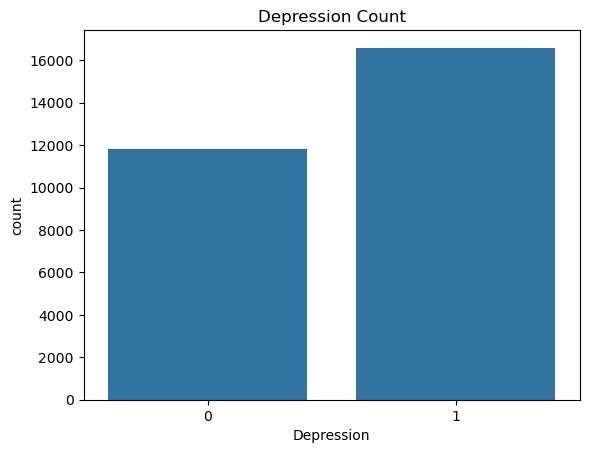

In [8]:
sns.countplot(data=df, x='Depression')
plt.title('Depression Count')
plt.show()

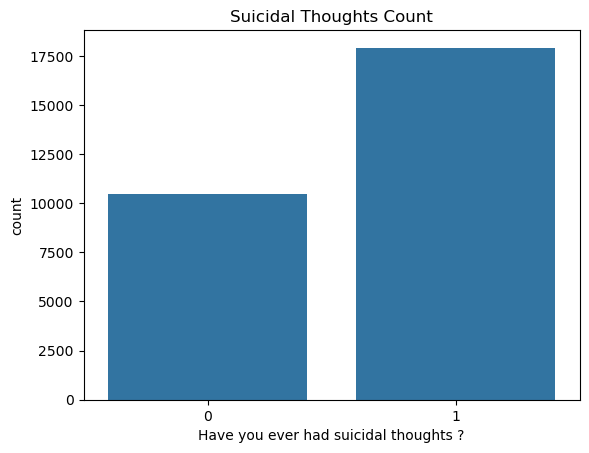

In [10]:
sns.countplot(data=df, x='Have you ever had suicidal thoughts ?')
plt.title('Suicidal Thoughts Count')
plt.show()

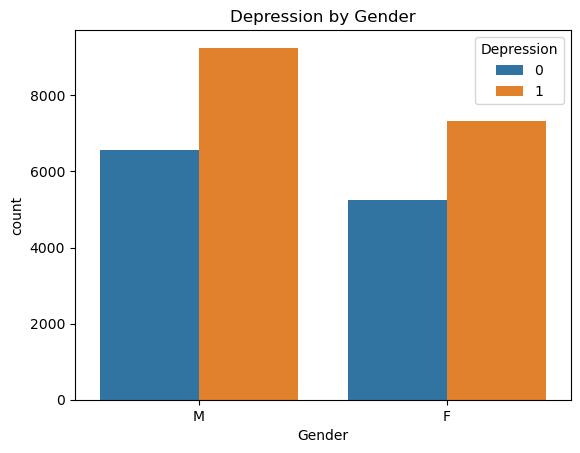

In [11]:
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title('Depression by Gender')
plt.show()


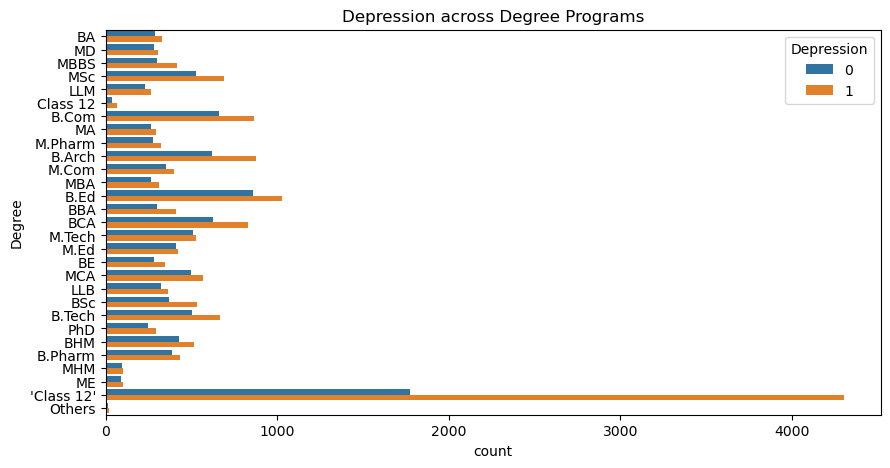

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Degree', hue='Depression')
plt.title('Depression across Degree Programs')
plt.show()


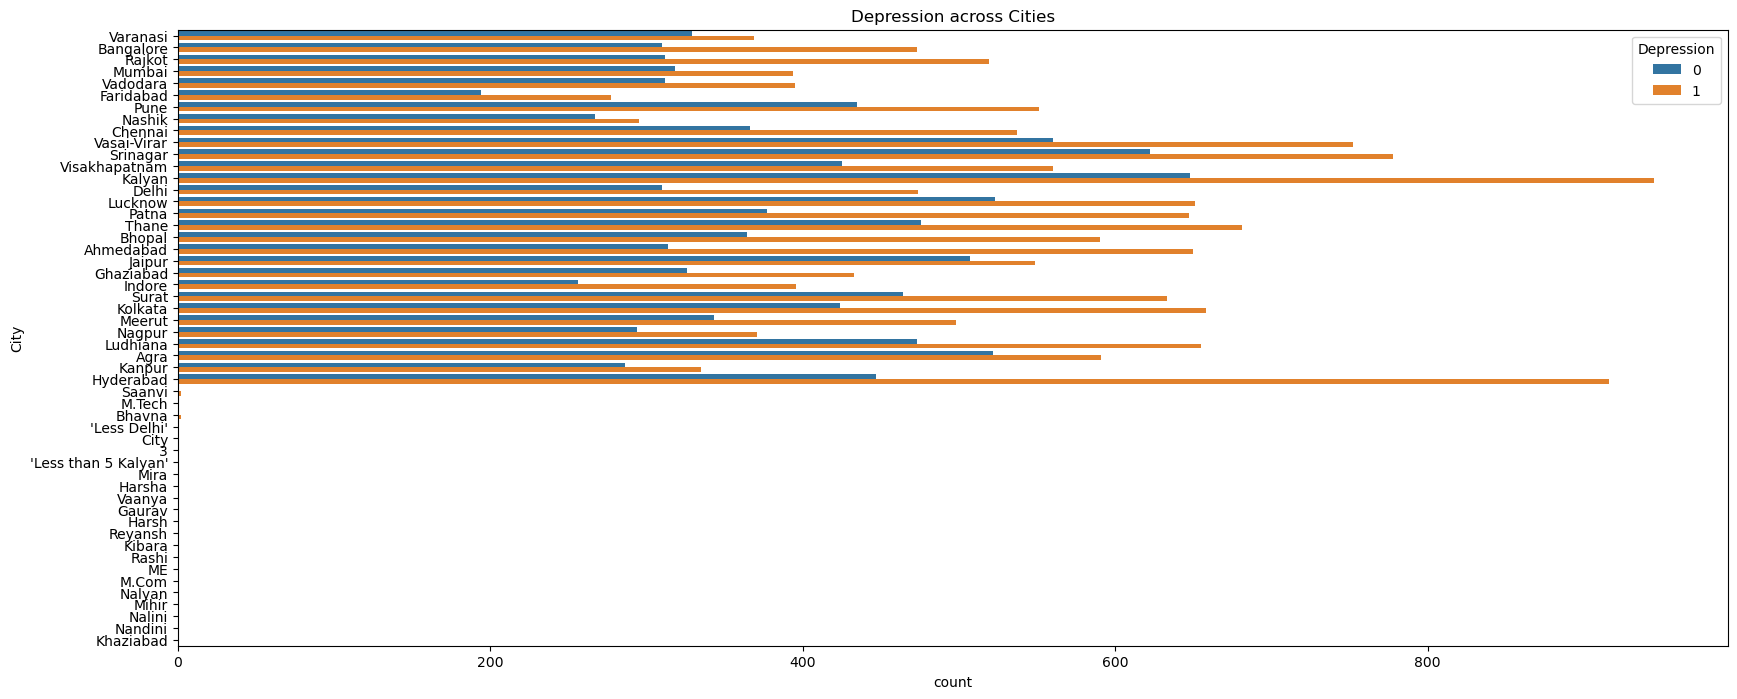

In [9]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, y='City', hue='Depression')
plt.title('Depression across Cities')
plt.show()
